# MNIST DATASET 
# Test on classes imbalance

In [167]:
#!pip install seaborn
#!pip install keras
#!pip install tensorflow

In [168]:
#import warnings
#warnings.filterwarnings('ignore')

In [169]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import random
import math
from torch.utils.tensorboard import SummaryWriter
from matplotlib import pyplot


from pathlib import Path
import requests
import pickle
import gzip

import torch
import math
import torch.nn.functional as F
from torch import nn
from torch import optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

pd.options.display.float_format = "{:,.4f}".format

In [435]:
# the data, split between train and validation sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data

In [261]:
x_train.shape

(60000, 28, 28)

In [262]:
x_test.shape

(10000, 28, 28)

In [263]:
x_train.dtype

dtype('uint8')

In [264]:
x_train.min()

0

In [265]:
x_train.max()

255

In [266]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

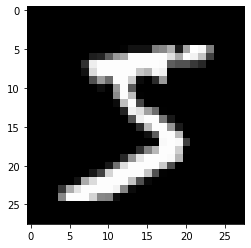

In [267]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

Here were are interested to study classes imbalance, so we are focusing our work on binary classes 0 and 1 

In [268]:
train_index= y_train[:] <= 1

In [269]:
x_train= x_train[train_index]

In [270]:
y_train = y_train[train_index]

In [271]:
x_train.shape

(12665, 28, 28)

In [272]:
y_train.shape

(12665,)

In [273]:
test_index = y_test[:] <= 1

In [274]:
x_test = x_test[test_index]
y_test = y_test[test_index]

In [275]:
x_test.shape

(2115, 28, 28)

In [276]:
y_test.shape

(2115,)

In [277]:
#normalize data 
x_train = x_train/255
x_test = x_test/255

# Ploting

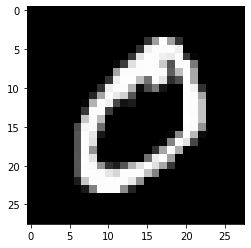

In [278]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

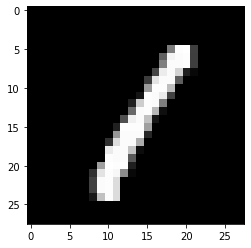

In [279]:
import matplotlib.pyplot as plt

image = x_train[1]
plt.imshow(image, cmap='gray')

<function matplotlib.pyplot.show(close=None, block=None)>

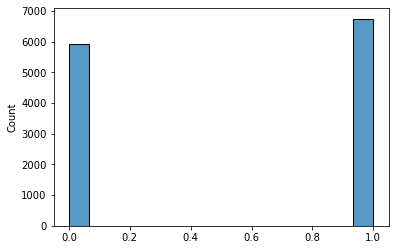

In [280]:
sns.histplot(y_train)
plt.show

# Imbalance learn

In [281]:
from imblearn.datasets import make_imbalance

In [282]:
from collections import Counter
def ratio_func(y, multiplier, minority_class):
    target_stats = Counter(y)
    return {minority_class: int(multiplier * target_stats[minority_class])}

In [283]:
def unbalancing(x_train, y_train, M ,ratio):
  x_unbal = x_train.reshape(-1, 784)
  X = pd.DataFrame(x_unbal)
  X_resampled, y_resampled = make_imbalance(X,
        y_train,
        sampling_strategy=ratio_func,
        **{"multiplier": ratio, "minority_class": M},
    )
  plt.hist(y_resampled)
  plt.title("Ratio ")
  plt.show()
  ### RATIO 
  x_train = X_resampled.to_numpy().reshape(-1,28,28)
  y_train = y_resampled
  return x_train, y_train

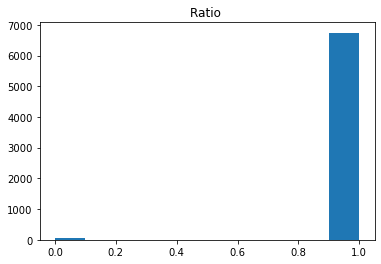

In [284]:
# Global unbalancing
x_train, y_train = unbalancing(x_train, y_train, 0 ,1/100)

# Spliting N Nodes 

In [436]:
def label_index(y_train) : 
    label = {}
    for i in range(len(y_train)) : 
        if y_train[i] in label.keys():
            label[y_train[i]].append(i)
        else : 
            label[y_train[i]] = [i]
                            
    return label

In [464]:
import random
def iid_split(nodes, label_dict) :
    node_dict= {}
    for node in range(nodes):
        node_dict[node] ={}
        number_of_label_per_nodes = {}
        for label in label_dict.keys():
            number_of_label_per_nodes[label] = len(label_dict[label])//nodes
        for label in label_dict.keys():
            for n in range(number_of_label_per_nodes[label]):
                k = random.choice(range(len(label_dict[label])))
                j = label_dict[label].pop(k)
                node_dict[node].append(j)      
    return node_dict, number_of_label_per_nodes, label_dict
            
        

In [501]:
def number_of_labels_by_nodes(nodes, label_dict):
    num_by_node = {}
    for key in label_dict.keys():
        num_by_node[key] = len(label_dict[key])//nodes
    return num_by_node

In [502]:
label_dict = label_index(y_train)

In [503]:
num_by_node= number_of_labels_by_nodes(5,label_dict)

In [504]:
def iid_split(nodes, label_dict, num_by_node) :
    node_dict= {}
    for node in range(nodes):
        node_dict[node] =[]
        for label in label_dict.keys():
            for n in range(num_by_node[label]):
                k = random.choice(range(len(label_dict[label])))
                j = label_dict[label].pop(k)
                node_dict[node].append(j)      
    return node_dict
        

In [505]:
z = iid_split(5,label_dict,num_by_node)

In [542]:
def node_split (x_train, y_train, node_dict):
    x_train_dict = {}
    y_train_dict = {}
    for key in node_dict.keys():
        x_train_dict[key] = np.array([x_train[i-1] for i in z[key]])
        y_train_dict[key] = [y_train[i-1] for i in z[key]]
    return x_train_dict, y_train_dict

In [543]:
x,y = node_split(x_train,y_train,z)

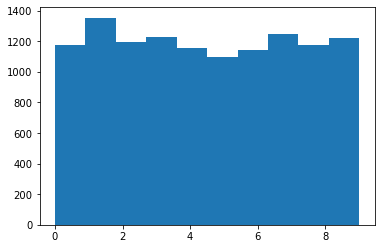

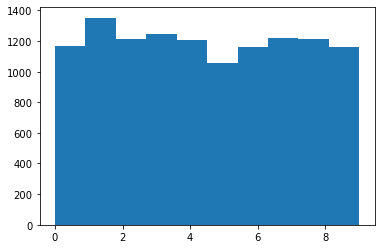

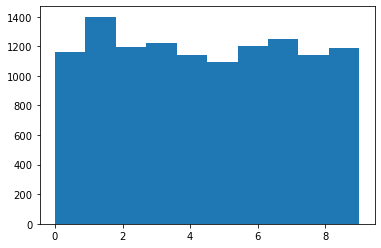

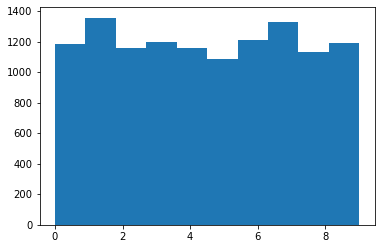

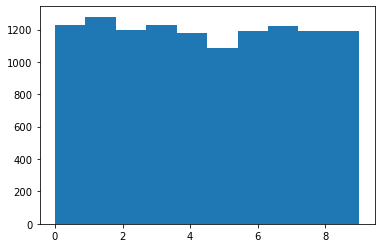

KeyError: 5

In [548]:
for i in range(6):
    plt.hist(y[i])
    plt.show()

# Spliting Data in validation and nodes

In [285]:
from sklearn.model_selection import train_test_split # Here we just use train test split to cut the dataset into 2 iid parts. 
X1, X2, y1, y2 = train_test_split(x_train, y_train, random_state=42,stratify= y_train, test_size=0.50  )

In [286]:
X1.shape

(3400, 28, 28)

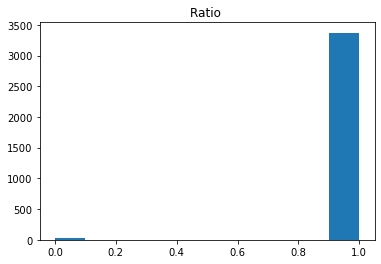

In [518]:
# local unbalancing
X1, y1 = unbalancing(X1, y1, 0, 1/100)

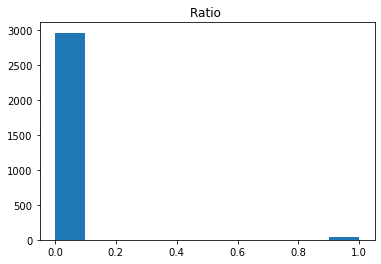

In [519]:
# local unbalancing
X2, y2 = unbalancing(X2, y2, 1,1/100)

In [287]:
X1_train, X1_valid, y1_train, y1_valid =  train_test_split(X1, y1, random_state=42,stratify= y1, test_size=0.20)
X2_train, X2_valid, y2_train, y2_valid =  train_test_split(X2, y2, random_state=42,stratify= y2, test_size=0.20)


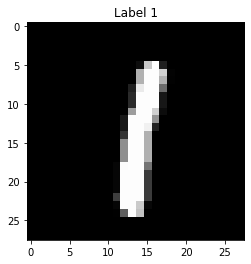

In [288]:
import matplotlib.pyplot as plt

image = X1_valid[55]
plt.title('Label {}'.format(y1_valid[55]))
plt.imshow(image, cmap='gray')
plt.show()

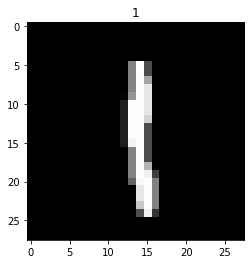

In [289]:
import matplotlib.pyplot as plt

image = X2_valid[0]
plt.title('{}'.format(y2_valid[0]))
plt.imshow(image, cmap='gray')
plt.show()

In [290]:
x_train_dict, y_train_dict = {'node0': X1_train , 'node1' : X2_train},{'node0': y1_train , 'node1' : y2_train}

In [291]:
x_valid_dict, y_valid_dict =  {'node0': X1_valid , 'node1' : X2_valid},{'node0': y1_valid , 'node1' : y2_valid}

(array([  23.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2697.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

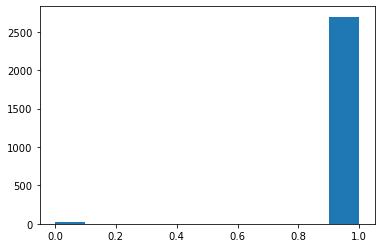

In [292]:
import seaborn as sns
plt.hist(y_train_dict['node0'])

(array([  24.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2696.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

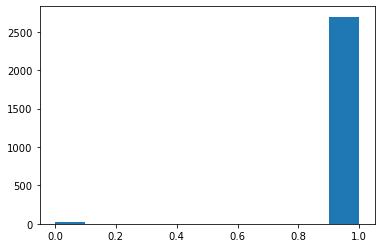

In [293]:
import seaborn as sns
plt.hist(y_train_dict['node1'])

# Model 

In [294]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import models, transforms
import time
import copy
from torch.utils.data import DataLoader, Dataset

In [295]:
class Mymodel(nn.Module):
    def __init__(self):
        super(Mymodel, self).__init__()
        self.resnet = models.resnet18(weights='DEFAULT')
        # change input layer
        # the default number of input channel in the resnet is 3, but our images are 1 channel. So we have to change 3 to 1.
        # nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) <- default
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        # change fc layer
        # the number of classes in our dataset is 2. default is 1000.
        self.resnet.num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(self.resnet.num_ftrs, 2)

In [296]:
from tqdm import tqdm
from time import sleep
from tqdm import trange

In [297]:
X=Mymodel() # Model de depart

In [298]:
X.resnet.fc

Linear(in_features=512, out_features=2, bias=True)

In [299]:
#To fit the model 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft = X.resnet.to(device)

In [300]:
main_model = model_ft
learning_rate = 0.001
numEpoch = 10

In [301]:
model_ft.fc

Linear(in_features=512, out_features=2, bias=True)

In [302]:
def create_model_dict(number_of_nodes):
    model_dict = dict()
    
    for i in range(number_of_nodes):
        model_name="node"+str(i)
        model_info= Mymodel().resnet
        model_dict.update({model_name : model_info })
        
        
    return model_dict

In [303]:
model_dict = create_model_dict(2)

In [304]:
name_of_x_train_sets=list(x_train_dict.keys())
name_of_y_train_sets=list(y_train_dict.keys())
name_of_x_valid_sets=list(x_valid_dict.keys())
name_of_y_valid_sets=list(y_valid_dict.keys())
#name_of_x_test_sets=list(x_test_dict.keys())
#name_of_y_test_sets=list(y_test_dict.keys())

name_of_models=list(model_dict.keys())
# print(name_of_x_train_sets)
# print(name_of_y_train_sets)
# print(name_of_x_valid_sets)
# print(name_of_y_valid_sets)
# print(name_of_x_test_sets)
# print(name_of_y_test_sets)
# print("\n ------------")
# print(name_of_models)
# print(name_of_optimizers)
# print(name_of_criterions)

In [305]:
#before sending main model to nodes
print(main_model.fc.weight[0:1,0:5])
print(model_dict["node1"].fc.weight[0:1,0:5])
print(model_dict["node0"].fc.weight[0:1,0:5])

tensor([[ 0.0015,  0.0181,  0.0333,  0.0164, -0.0352]],
       grad_fn=<SliceBackward0>)
tensor([[-0.0211,  0.0427,  0.0028,  0.0418, -0.0376]],
       grad_fn=<SliceBackward0>)
tensor([[-0.0194,  0.0081,  0.0064,  0.0156,  0.0327]],
       grad_fn=<SliceBackward0>)


In [306]:
number_of_nodes = 2

In [307]:
model_dict['node0']

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [308]:
for name, param  in main_model.named_parameters():
    print(name)

conv1.weight
bn1.weight
bn1.bias
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer2.0.conv1.weight
layer2.0.bn1.weight
layer2.0.bn1.bias
layer2.0.conv2.weight
layer2.0.bn2.weight
layer2.0.bn2.bias
layer2.0.downsample.0.weight
layer2.0.downsample.1.weight
layer2.0.downsample.1.bias
layer2.1.conv1.weight
layer2.1.bn1.weight
layer2.1.bn1.bias
layer2.1.conv2.weight
layer2.1.bn2.weight
layer2.1.bn2.bias
layer3.0.conv1.weight
layer3.0.bn1.weight
layer3.0.bn1.bias
layer3.0.conv2.weight
layer3.0.bn2.weight
layer3.0.bn2.bias
layer3.0.downsample.0.weight
layer3.0.downsample.1.weight
layer3.0.downsample.1.bias
layer3.1.conv1.weight
layer3.1.bn1.weight
layer3.1.bn1.bias
layer3.1.conv2.weight
layer3.1.bn2.weight
layer3.1.bn2.bias
layer4.0.conv1.weight
layer4.0.bn1.weight
layer4.0.bn1.bias
layer4.0.conv2.we

In [309]:
name_of_models

['node0', 'node1']

In [310]:
def send_main_model_to_nodes_and_update_model_dict(main_model, model_dict, number_of_nodes): 
    with torch.no_grad():
        for i in range(number_of_nodes):
            state_dict= copy.deepcopy(main_model.state_dict())
            model_dict[name_of_models[i]].load_state_dict(state_dict)
    return model_dict

In [311]:
# We send the main model to the nodes. 
model_dict=send_main_model_to_nodes_and_update_model_dict(main_model, model_dict, number_of_nodes)

In [312]:
# We see here they have the same parameter on the randomly initialize layer. 
print(main_model.fc.weight[0:1,0:5])
print(model_dict["node0"].fc.weight[0:1,0:5])
print(model_dict["node1"].fc.weight[0:1,0:5])

tensor([[ 0.0015,  0.0181,  0.0333,  0.0164, -0.0352]],
       grad_fn=<SliceBackward0>)
tensor([[ 0.0015,  0.0181,  0.0333,  0.0164, -0.0352]],
       grad_fn=<SliceBackward0>)
tensor([[ 0.0015,  0.0181,  0.0333,  0.0164, -0.0352]],
       grad_fn=<SliceBackward0>)


In [313]:
id(main_model)

1836422802592

In [314]:
print(id(model_dict["node0"]))
print(id(model_dict["node1"]))

1836422895888
1836411202384


In [315]:
def fedavg(main_model, model_dict, number_of_nodes):  #with equality splited data
    state_dict = model_dict[name_of_models[0]].state_dict()
    for name, param in model_dict[name_of_models[0]].named_parameters():
        for i in range(1, number_of_nodes):
            state_dict[name]=  state_dict[name] + model_dict[name_of_models[i]].state_dict()[name]
        state_dict[name] = state_dict[name]/number_of_nodes
    new_model = Mymodel().resnet    
    new_model.load_state_dict(state_dict)
    return new_model

In [316]:
# We see here they have the same parameter
print(main_model.fc.weight[0:1,0:5])
print(model_dict["node0"].fc.weight[0:1,0:5])
print(model_dict["node1"].fc.weight[0:1,0:5])
new = fedavg(main_model, model_dict, number_of_nodes)

tensor([[ 0.0015,  0.0181,  0.0333,  0.0164, -0.0352]],
       grad_fn=<SliceBackward0>)
tensor([[ 0.0015,  0.0181,  0.0333,  0.0164, -0.0352]],
       grad_fn=<SliceBackward0>)
tensor([[ 0.0015,  0.0181,  0.0333,  0.0164, -0.0352]],
       grad_fn=<SliceBackward0>)


In [317]:
print(new.fc.weight[0:1,0:5])

tensor([[ 0.0015,  0.0181,  0.0333,  0.0164, -0.0352]],
       grad_fn=<SliceBackward0>)


In [318]:
modelA = Mymodel().resnet
modelB = Mymodel().resnet
model_dict["node0"] =modelA
model_dict["node1"] = modelB
print(modelA.fc.weight[0:1,0:5])
print(modelB.fc.weight[0:1,0:5])

tensor([[-0.0067, -0.0345,  0.0203, -0.0355, -0.0426]],
       grad_fn=<SliceBackward0>)
tensor([[ 0.0262,  0.0049, -0.0403,  0.0259,  0.0293]],
       grad_fn=<SliceBackward0>)


In [319]:
new = fedavg(main_model, model_dict, number_of_nodes)
print(main_model.fc.weight[0:1,0:5])
print(new.fc.weight[0:1,0:5])

tensor([[ 0.0015,  0.0181,  0.0333,  0.0164, -0.0352]],
       grad_fn=<SliceBackward0>)
tensor([[ 0.0098, -0.0148, -0.0100, -0.0048, -0.0067]],
       grad_fn=<SliceBackward0>)


# Preprocessing

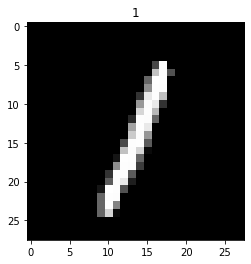

In [320]:
import matplotlib.pyplot as plt
i= 345
image = x_valid_dict['node1'][i]
plt.title('{}'.format( y_valid_dict['node1'][i]))
plt.imshow(image, cmap='gray')
plt.show()

In [321]:
# define custom dataset
class MyDataset(Dataset):
    def __init__(self, feature, target=None, transform=None):

        self.X = feature
        self.Y = target
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.transform is not None:
            return self.transform(self.X[idx]), self.Y[idx]
        elif self.Y is None:
            return [self.X[idx]]
        return self.X[idx], self.Y[idx]

In [322]:
# data reshape
def data_reshape(train_split,train_labels_split,validation_split,validation_labels_split) :
    # test_data = torch.from_numpy(test_split.reshape((-1,1,28,28)))
    train_data = torch.from_numpy(train_split.reshape((-1,1,28,28)))
    train_labels_data =  torch.from_numpy(train_labels_split)
    validation_data = torch.from_numpy(validation_split.reshape((-1,1,28,28)))
    validation_labels_data =  torch.from_numpy(validation_labels_split)
    return train_data, validation_data, train_labels_data,  validation_labels_data

In [323]:
def data_loader(train_data, validation_data, train_labels_data,  validation_labels_data):
    train_set = MyDataset(train_data.float(), train_labels_data)
    valid_set = MyDataset(validation_data.float(), validation_labels_data)
    # test_set = MyDataset(test_data.float())
    batch_size = 32
    train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, shuffle = True)
    valid_loader = torch.utils.data.DataLoader(valid_set, batch_size = batch_size, shuffle = False)
    # test_loader = torch.utils.data.DataLoader(test_set, batch_size = batch_size, shuffle = False)
    return train_set, valid_set, train_loader, valid_loader

In [324]:
def transform_load(train_data, train_labels_data, train_set, train_loader): # calculate mean and std of train_set for normalize
    data = next(iter(train_loader))
    mean = data[0].mean()
    std = data[0].std()

    # set transformation option
    transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.RandomAffine(degrees = 30),
            transforms.RandomPerspective(),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)])

    # augmented train_set
    augmented_train_set = MyDataset(train_data.float(), train_labels_data, transform=transform)

    # combine original set with augmented set
    datasets = []
    datasets.append(train_set)
    datasets.append(augmented_train_set)
    train_set = torch.utils.data.ConcatDataset(datasets)

    # redefine train_loader
    train_loader = torch.utils.data.DataLoader(train_set, batch_size = 32, shuffle = True)
    return train_loader

In [325]:
def preprocessing(x_train_dict , y_train_dict, x_valid_dict , y_valid_dict):
    data_resh, data_load,trans = {},{},{}
    for i in x_train_dict.keys() :
        data_resh[i]= data_reshape(x_train_dict[i] , y_train_dict[i], x_valid_dict[i] , y_valid_dict[i])
        data_load[i]= data_loader(data_resh[i][0], data_resh[i][1],data_resh[i][2], data_resh[i][3])
        trans[i] = transform_load(data_resh[i][0], data_resh[i][2], data_load[i][0], data_load[i][2])
    return data_load , trans

In [326]:
data_load, trans = preprocessing(x_train_dict , y_train_dict, x_valid_dict , y_valid_dict)


In [327]:
from tqdm import tqdm
from time import sleep
from tqdm import trange
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import models, transforms
import time
import copy
from torch.utils.data import DataLoader, Dataset

def train_model(model, criterion, optimizer, scheduler,  train_loader, valid_loader, train_set, valid_set,num_epochs= 10 ):
    dataloaders = {'train': train_loader, 'val': valid_loader} 
    dataset_sizes= {'train': len(train_set), 'val': len(valid_set)} 
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    pbar = trange(num_epochs, unit="Epoch")
    for epoch in pbar:
        sleep(0.5)
        #print('Epoch {}/{}'.format(epoch + 1, num_epochs))
        #print('-' * 10)

        # Each epoch has a training and validation phase
        pbar.set_description(f"Epoch {epoch}")
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            #print('{} Loss: {:.4f} Acc: {:.4f}'.format(
            #    phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        #print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    pbar.close()
    return model

In [328]:
data_load['node0']

(<__main__.MyDataset at 0x1ac1252f2e0>,
 <torch.utils.data.dataloader.DataLoader at 0x1ab99140e50>)

In [329]:
def format_test_data(test_data):
    test_data = torch.from_numpy(test_data.reshape((-1,1,28,28)))
    test_set = MyDataset(test_data.float())
    test_loader = torch.utils.data.DataLoader(test_set, batch_size = 32, shuffle = False)
    return test_loader


In [330]:
def predict(test_loader, model_ft):
    test_pred = torch.LongTensor()
    with torch.no_grad():
        for images in test_loader:
            images = torch.autograd.Variable(images[0])
            if torch.cuda.is_available():
                images = images.to(device)

            outputs = model_ft(images)
            predicted = outputs.cpu().data.max(1, keepdim=True)[1]
            test_pred = torch.cat((test_pred, predicted), dim=0)
    return test_pred

In [331]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
def evaluation_met(test_pred, test_label_split, ratio = 'Balanced data'):  
    filt0 = test_label_split == 0
    filt1 = test_label_split == 1
    fpr, tpr, thresholds = metrics.roc_curve(test_pred, test_label_split, pos_label=1)
    acc = accuracy_score(test_pred,test_label_split)   
    acc0 = accuracy_score(test_pred[filt0],test_label_split[filt0])
    acc1 = accuracy_score(test_pred[filt1],test_label_split[filt1])
    Auc = metrics.auc(fpr, tpr)
    print('For {} :, acc : {}, acc0 : {} , acc1:{} , AUC : {} '.format(ratio,acc, acc0,acc1, Auc))
    return {'ratio' : ratio, 'acc' :acc,'acc0':acc0, 'acc1':acc1, 'AUC':Auc}

In [332]:

def training_plan(main_model,model_dict,data_load, Round=3, number_of_nodes=2):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    criterion = nn.CrossEntropyLoss()
   
    for i in range(Round):
        print('Round '+ str(i+1))
        print('Sending main model to nodes in round '+ str(i+1))
        model_dict = send_main_model_to_nodes_and_update_model_dict(main_model, model_dict, number_of_nodes)
        for j in model_dict.keys():
            print('training {} for Round {} :'.format(j,i))
            model = model_dict[j].to(device)
            optimizer = optim.SGD(model.parameters(), lr=0.001)
            scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
            train_loader = trans[j]
            valid_loader =  data_load[j][3]
            train_set =  data_load[j][0]
            valid_set =  data_load[j][1]
            model_dict[j] = train_model(model, criterion, optimizer, scheduler,  train_loader, valid_loader, train_set, valid_set)
        print('Fedavg of main model in round '+ str(i+1))
        main_model = fedavg(main_model, model_dict, number_of_nodes)    
        
    return model_dict, main_model

# Balanced

In [241]:
model_dict_B, model_B = training_plan(main_model,model_dict,data_load)

Round 1
Sending main model to nodes in round 1
training node0 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [13:39<00:00, 82.00s/Epoch]


Training complete in 13m 40s
Best val Acc: 0.994475
training node1 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [12:47<00:00, 76.79s/Epoch]


Training complete in 12m 48s
Best val Acc: 0.996843
Fedavg of main model in round 1
Round 2
Sending main model to nodes in round 2
training node0 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [12:16<00:00, 73.65s/Epoch]


Training complete in 12m 17s
Best val Acc: 0.997632
training node1 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [12:14<00:00, 73.43s/Epoch]


Training complete in 12m 14s
Best val Acc: 0.996843
Fedavg of main model in round 2
Round 3
Sending main model to nodes in round 3
training node0 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [12:20<00:00, 74.02s/Epoch]


Training complete in 12m 20s
Best val Acc: 0.998421
training node1 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [12:20<00:00, 74.04s/Epoch]


Training complete in 12m 20s
Best val Acc: 0.997632
Fedavg of main model in round 3


In [345]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_B)
evaluation_met(pred, y_test,ratio = 'Balanced data ')

For Balanced data  :, acc : 0.9739952718676123, acc0 : 0.9846938775510204 , acc1:0.9647577092511013 , AUC : 0.9733427457308053 


{'ratio': 'Balanced data ',
 'acc': 0.9739952718676123,
 'acc0': 0.9846938775510204,
 'acc1': 0.9647577092511013,
 'AUC': 0.9733427457308053}

In [346]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_B['node0'])
evaluation_met(pred, y_test,ratio = 'Balanced data node 0')

For Balanced data node 0 :, acc : 0.9971631205673759, acc0 : 0.9989795918367347 , acc1:0.9955947136563876 , AUC : 0.9970172629445128 


{'ratio': 'Balanced data node 0',
 'acc': 0.9971631205673759,
 'acc0': 0.9989795918367347,
 'acc1': 0.9955947136563876,
 'AUC': 0.9970172629445128}

In [347]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_B['node1'])
evaluation_met(pred, y_test,ratio = 'Balanced data node 1')

For Balanced data node 1 :, acc : 0.9981087470449173, acc0 : 1.0 , acc1:0.9964757709251101 , AUC : 0.9979674796747968 


{'ratio': 'Balanced data node 1',
 'acc': 0.9981087470449173,
 'acc0': 1.0,
 'acc1': 0.9964757709251101,
 'AUC': 0.9979674796747968}

# Ratio 1:10 local Unbalance globally balanced

In [336]:
model_dict_10, model_10 = training_plan(main_model,model_dict,data_load)

Round 1
Sending main model to nodes in round 1
training node0 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [10:10<00:00, 61.04s/Epoch]


Training complete in 10m 10s
Best val Acc: 0.998638
training node1 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [09:04<00:00, 54.45s/Epoch]


Training complete in 9m 5s
Best val Acc: 0.998485
Fedavg of main model in round 1
Round 2
Sending main model to nodes in round 2
training node0 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [10:11<00:00, 61.17s/Epoch]


Training complete in 10m 12s
Best val Acc: 0.998638
training node1 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [09:06<00:00, 54.60s/Epoch]


Training complete in 9m 6s
Best val Acc: 0.998485
Fedavg of main model in round 2
Round 3
Sending main model to nodes in round 3
training node0 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [10:07<00:00, 60.76s/Epoch]


Training complete in 10m 8s
Best val Acc: 0.998638
training node1 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [09:07<00:00, 54.76s/Epoch]


Training complete in 9m 8s
Best val Acc: 0.998485
Fedavg of main model in round 3


In [348]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_10)
evaluation_met(pred, y_test,ratio = '1:10 local with global Balanced data')

For 1:10 local with global Balanced data :, acc : 0.933806146572104, acc0 : 0.9683673469387755 , acc1:0.9039647577092511 , AUC : 0.9338235688621898 


{'ratio': '1:10 local with global Balanced data',
 'acc': 0.933806146572104,
 'acc0': 0.9683673469387755,
 'acc1': 0.9039647577092511,
 'AUC': 0.9338235688621898}

In [349]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_10['node0'])
evaluation_met(pred, y_test,ratio = '1:10 local with global Balanced data node 0')

For 1:10 local with global Balanced data node 0 :, acc : 0.9895981087470449, acc0 : 0.9785714285714285 , acc1:0.9991189427312775 , AUC : 0.9903882575757575 


{'ratio': '1:10 local with global Balanced data node 0',
 'acc': 0.9895981087470449,
 'acc0': 0.9785714285714285,
 'acc1': 0.9991189427312775,
 'AUC': 0.9903882575757575}

In [350]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_10['node1'])
evaluation_met(pred, y_test,ratio = '1:10 local with global Balanced data node 1')

For 1:10 local with global Balanced data node 1 :, acc : 0.9962174940898345, acc0 : 1.0 , acc1:0.9929515418502203 , AUC : 0.9959514170040487 


{'ratio': '1:10 local with global Balanced data node 1',
 'acc': 0.9962174940898345,
 'acc0': 1.0,
 'acc1': 0.9929515418502203,
 'AUC': 0.9959514170040487}

# Ratio 1:20 local Unbalance globally balanced

In [415]:
model_dict_20, model_20 = training_plan(main_model,model_dict,data_load)

Round 1
Sending main model to nodes in round 1
training node0 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [10:11<00:00, 61.18s/Epoch]


Training complete in 10m 12s
Best val Acc: 0.998638
training node1 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [09:09<00:00, 54.98s/Epoch]


Training complete in 9m 10s
Best val Acc: 0.996970
Fedavg of main model in round 1
Round 2
Sending main model to nodes in round 2
training node0 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [10:10<00:00, 61.09s/Epoch]


Training complete in 10m 11s
Best val Acc: 0.998638
training node1 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [09:18<00:00, 55.87s/Epoch]


Training complete in 9m 19s
Best val Acc: 0.996970
Fedavg of main model in round 2
Round 3
Sending main model to nodes in round 3
training node0 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [10:22<00:00, 62.25s/Epoch]


Training complete in 10m 22s
Best val Acc: 0.998638
training node1 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [09:19<00:00, 55.93s/Epoch]


Training complete in 9m 19s
Best val Acc: 0.996970
Fedavg of main model in round 3


In [416]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_20)
evaluation_met(pred, y_test,ratio = '1:20 local with global Balanced data')

For 1:20 local with global Balanced data :, acc : 0.9276595744680851, acc0 : 0.8510204081632653 , acc1:0.9938325991189427 , AUC : 0.9385384447385468 


{'ratio': '1:20 local with global Balanced data',
 'acc': 0.9276595744680851,
 'acc0': 0.8510204081632653,
 'acc1': 0.9938325991189427,
 'AUC': 0.9385384447385468}

In [417]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_20['node0'])
evaluation_met(pred, y_test,ratio = '1:20 local with global Balanced data node 0')

For 1:20 local with global Balanced data node 0 :, acc : 0.9957446808510638, acc0 : 0.9908163265306122 , acc1:1.0 , AUC : 0.9960664335664335 


{'ratio': '1:20 local with global Balanced data node 0',
 'acc': 0.9957446808510638,
 'acc0': 0.9908163265306122,
 'acc1': 1.0,
 'AUC': 0.9960664335664335}

In [418]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_20['node1'])
evaluation_met(pred, y_test,ratio = '1:20 local with global Balanced data node 1')

For 1:20 local with global Balanced data node 1 :, acc : 0.9853427895981087, acc0 : 0.9989795918367347 , acc1:0.973568281938326 , AUC : 0.9846817162714592 


{'ratio': '1:20 local with global Balanced data node 1',
 'acc': 0.9853427895981087,
 'acc0': 0.9989795918367347,
 'acc1': 0.973568281938326,
 'AUC': 0.9846817162714592}

# Ratio 1:50 local Unbalance globally balanced

In [467]:
model_dict_50, model_50 = training_plan(main_model,model_dict,data_load)

Round 1
Sending main model to nodes in round 1
training node0 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [09:37<00:00, 57.75s/Epoch]


Training complete in 9m 38s
Best val Acc: 0.997085
training node1 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [08:40<00:00, 52.00s/Epoch]


Training complete in 8m 40s
Best val Acc: 1.000000
Fedavg of main model in round 1
Round 2
Sending main model to nodes in round 2
training node0 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [09:50<00:00, 59.05s/Epoch]


Training complete in 9m 50s
Best val Acc: 0.995627
training node1 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [08:38<00:00, 51.87s/Epoch]


Training complete in 8m 39s
Best val Acc: 1.000000
Fedavg of main model in round 2
Round 3
Sending main model to nodes in round 3
training node0 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [09:49<00:00, 58.91s/Epoch]


Training complete in 9m 49s
Best val Acc: 0.998542
training node1 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [08:35<00:00, 51.56s/Epoch]


Training complete in 8m 36s
Best val Acc: 1.000000
Fedavg of main model in round 3


In [468]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_50)
evaluation_met(pred, y_test,ratio = '1:50 local with global Balanced data')

For 1:50 local with global Balanced data :, acc : 0.7200945626477542, acc0 : 0.4153061224489796 , acc1:0.9832599118942731 , AUC : 0.808072532292631 


{'ratio': '1:50 local with global Balanced data',
 'acc': 0.7200945626477542,
 'acc0': 0.4153061224489796,
 'acc1': 0.9832599118942731,
 'AUC': 0.808072532292631}

In [469]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_50['node0'])
evaluation_met(pred, y_test,ratio = '1:50 local with global Balanced data node 0')

For 1:50 local with global Balanced data node 0 :, acc : 0.9735224586288416, acc0 : 0.9428571428571428 , acc1:1.0 , AUC : 0.9764903442485307 


{'ratio': '1:50 local with global Balanced data node 0',
 'acc': 0.9735224586288416,
 'acc0': 0.9428571428571428,
 'acc1': 1.0,
 'AUC': 0.9764903442485307}

In [470]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_50['node1'])
evaluation_met(pred, y_test,ratio = '1:50 local with global Balanced data node 1')

For 1:50 local with global Balanced data node 1 :, acc : 0.9612293144208038, acc0 : 1.0 , acc1:0.9277533039647577 , AUC : 0.9613935969868173 


{'ratio': '1:50 local with global Balanced data node 1',
 'acc': 0.9612293144208038,
 'acc0': 1.0,
 'acc1': 0.9277533039647577,
 'AUC': 0.9613935969868173}

# Ratio 1:100 local Unbalance globally balanced

In [566]:
model_dict_100, model_100 = training_plan(main_model,model_dict,data_load)

Round 1
Sending main model to nodes in round 1
training node0 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [09:52<00:00, 59.21s/Epoch]


Training complete in 9m 52s
Best val Acc: 0.995588
training node1 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [08:34<00:00, 51.46s/Epoch]


Training complete in 8m 35s
Best val Acc: 1.000000
Fedavg of main model in round 1
Round 2
Sending main model to nodes in round 2
training node0 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [09:50<00:00, 59.00s/Epoch]


Training complete in 9m 50s
Best val Acc: 0.997059
training node1 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [08:46<00:00, 52.68s/Epoch]


Training complete in 8m 47s
Best val Acc: 1.000000
Fedavg of main model in round 2
Round 3
Sending main model to nodes in round 3
training node0 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [09:52<00:00, 59.28s/Epoch]


Training complete in 9m 53s
Best val Acc: 1.000000
training node1 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [08:50<00:00, 53.03s/Epoch]


Training complete in 8m 50s
Best val Acc: 1.000000
Fedavg of main model in round 3


In [567]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_100)
evaluation_met(pred, y_test,ratio = '1:100 local with global Balanced data')

For 1:100 local with global Balanced data :, acc : 0.7366430260047281, acc0 : 0.4989795918367347 , acc1:0.9418502202643172 , AUC : 0.7831687456687456 


{'ratio': '1:100 local with global Balanced data',
 'acc': 0.7366430260047281,
 'acc0': 0.4989795918367347,
 'acc1': 0.9418502202643172,
 'AUC': 0.7831687456687456}

In [568]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_100['node0'])
evaluation_met(pred, y_test,ratio = '1:100 local with global Balanced data node 0')

For 1:100 local with global Balanced data node 0 :, acc : 0.9125295508274232, acc0 : 0.8112244897959183 , acc1:1.0 , AUC : 0.9299242424242424 


{'ratio': '1:100 local with global Balanced data node 0',
 'acc': 0.9125295508274232,
 'acc0': 0.8112244897959183,
 'acc1': 1.0,
 'AUC': 0.9299242424242424}

In [569]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_100['node1'])
evaluation_met(pred, y_test,ratio = '1:100 local with global Balanced data node 0')

For 1:100 local with global Balanced data node 0 :, acc : 0.9257683215130024, acc0 : 1.0 , acc1:0.8616740088105727 , AUC : 0.9309586631486367 


{'ratio': '1:100 local with global Balanced data node 0',
 'acc': 0.9257683215130024,
 'acc0': 1.0,
 'acc1': 0.8616740088105727,
 'AUC': 0.9309586631486367}

# 30 Rounds:  Ratio 1:100 local Unbalance globally balanced

In [570]:
model_dict_100, model_100 = training_plan(main_model,model_dict,data_load, Round =30)

Round 1
Sending main model to nodes in round 1
training node0 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [09:52<00:00, 59.28s/Epoch]


Training complete in 9m 53s
Best val Acc: 1.000000
training node1 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [08:45<00:00, 52.52s/Epoch]


Training complete in 8m 45s
Best val Acc: 1.000000
Fedavg of main model in round 1
Round 2
Sending main model to nodes in round 2
training node0 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [10:00<00:00, 60.08s/Epoch]


Training complete in 10m 1s
Best val Acc: 1.000000
training node1 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [08:50<00:00, 53.07s/Epoch]


Training complete in 8m 51s
Best val Acc: 1.000000
Fedavg of main model in round 2
Round 3
Sending main model to nodes in round 3
training node0 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [09:59<00:00, 59.92s/Epoch]


Training complete in 9m 59s
Best val Acc: 1.000000
training node1 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [08:51<00:00, 53.13s/Epoch]


Training complete in 8m 51s
Best val Acc: 1.000000
Fedavg of main model in round 3
Round 4
Sending main model to nodes in round 4
training node0 for Round 3 :


Epoch 9: 100%|██████████| 10/10 [10:00<00:00, 60.06s/Epoch]


Training complete in 10m 1s
Best val Acc: 1.000000
training node1 for Round 3 :


Epoch 9: 100%|██████████| 10/10 [08:46<00:00, 52.60s/Epoch]


Training complete in 8m 46s
Best val Acc: 1.000000
Fedavg of main model in round 4
Round 5
Sending main model to nodes in round 5
training node0 for Round 4 :


Epoch 9: 100%|██████████| 10/10 [09:58<00:00, 59.87s/Epoch]


Training complete in 9m 59s
Best val Acc: 1.000000
training node1 for Round 4 :


Epoch 9: 100%|██████████| 10/10 [08:43<00:00, 52.33s/Epoch]


Training complete in 8m 43s
Best val Acc: 1.000000
Fedavg of main model in round 5
Round 6
Sending main model to nodes in round 6
training node0 for Round 5 :


Epoch 9: 100%|██████████| 10/10 [09:57<00:00, 59.78s/Epoch]


Training complete in 9m 58s
Best val Acc: 1.000000
training node1 for Round 5 :


Epoch 9: 100%|██████████| 10/10 [08:51<00:00, 53.12s/Epoch]


Training complete in 8m 51s
Best val Acc: 1.000000
Fedavg of main model in round 6
Round 7
Sending main model to nodes in round 7
training node0 for Round 6 :


Epoch 9: 100%|██████████| 10/10 [09:57<00:00, 59.73s/Epoch]


Training complete in 9m 57s
Best val Acc: 1.000000
training node1 for Round 6 :


Epoch 9: 100%|██████████| 10/10 [08:50<00:00, 53.01s/Epoch]


Training complete in 8m 50s
Best val Acc: 1.000000
Fedavg of main model in round 7
Round 8
Sending main model to nodes in round 8
training node0 for Round 7 :


Epoch 9: 100%|██████████| 10/10 [09:58<00:00, 59.88s/Epoch]


Training complete in 9m 59s
Best val Acc: 1.000000
training node1 for Round 7 :


Epoch 9: 100%|██████████| 10/10 [08:50<00:00, 53.05s/Epoch]


Training complete in 8m 51s
Best val Acc: 1.000000
Fedavg of main model in round 8
Round 9
Sending main model to nodes in round 9
training node0 for Round 8 :


Epoch 9: 100%|██████████| 10/10 [09:56<00:00, 59.63s/Epoch]


Training complete in 9m 56s
Best val Acc: 1.000000
training node1 for Round 8 :


Epoch 9: 100%|██████████| 10/10 [08:48<00:00, 52.86s/Epoch]


Training complete in 8m 49s
Best val Acc: 1.000000
Fedavg of main model in round 9
Round 10
Sending main model to nodes in round 10
training node0 for Round 9 :


Epoch 9: 100%|██████████| 10/10 [10:00<00:00, 60.06s/Epoch]


Training complete in 10m 1s
Best val Acc: 1.000000
training node1 for Round 9 :


Epoch 9: 100%|██████████| 10/10 [08:52<00:00, 53.28s/Epoch]


Training complete in 8m 53s
Best val Acc: 1.000000
Fedavg of main model in round 10
Round 11
Sending main model to nodes in round 11
training node0 for Round 10 :


Epoch 9: 100%|██████████| 10/10 [10:02<00:00, 60.26s/Epoch]


Training complete in 10m 3s
Best val Acc: 1.000000
training node1 for Round 10 :


Epoch 9: 100%|██████████| 10/10 [08:39<00:00, 51.97s/Epoch]


Training complete in 8m 40s
Best val Acc: 1.000000
Fedavg of main model in round 11
Round 12
Sending main model to nodes in round 12
training node0 for Round 11 :


Epoch 9: 100%|██████████| 10/10 [09:40<00:00, 58.02s/Epoch]


Training complete in 9m 40s
Best val Acc: 1.000000
training node1 for Round 11 :


Epoch 9: 100%|██████████| 10/10 [08:35<00:00, 51.55s/Epoch]


Training complete in 8m 35s
Best val Acc: 1.000000
Fedavg of main model in round 12
Round 13
Sending main model to nodes in round 13
training node0 for Round 12 :


Epoch 9: 100%|██████████| 10/10 [09:48<00:00, 58.89s/Epoch]


Training complete in 9m 49s
Best val Acc: 1.000000
training node1 for Round 12 :


Epoch 9: 100%|██████████| 10/10 [08:30<00:00, 51.04s/Epoch]


Training complete in 8m 30s
Best val Acc: 1.000000
Fedavg of main model in round 13
Round 14
Sending main model to nodes in round 14
training node0 for Round 13 :


Epoch 9: 100%|██████████| 10/10 [09:39<00:00, 57.93s/Epoch]


Training complete in 9m 39s
Best val Acc: 1.000000
training node1 for Round 13 :


Epoch 9: 100%|██████████| 10/10 [08:32<00:00, 51.21s/Epoch]


Training complete in 8m 32s
Best val Acc: 1.000000
Fedavg of main model in round 14
Round 15
Sending main model to nodes in round 15
training node0 for Round 14 :


Epoch 9: 100%|██████████| 10/10 [09:45<00:00, 58.53s/Epoch]


Training complete in 9m 45s
Best val Acc: 1.000000
training node1 for Round 14 :


Epoch 9: 100%|██████████| 10/10 [08:34<00:00, 51.48s/Epoch]


Training complete in 8m 35s
Best val Acc: 1.000000
Fedavg of main model in round 15
Round 16
Sending main model to nodes in round 16
training node0 for Round 15 :


Epoch 9: 100%|██████████| 10/10 [10:02<00:00, 60.27s/Epoch]


Training complete in 10m 3s
Best val Acc: 1.000000
training node1 for Round 15 :


Epoch 9: 100%|██████████| 10/10 [08:33<00:00, 51.36s/Epoch]


Training complete in 8m 34s
Best val Acc: 1.000000
Fedavg of main model in round 16
Round 17
Sending main model to nodes in round 17
training node0 for Round 16 :


Epoch 9: 100%|██████████| 10/10 [09:42<00:00, 58.25s/Epoch]


Training complete in 9m 42s
Best val Acc: 1.000000
training node1 for Round 16 :


Epoch 9: 100%|██████████| 10/10 [08:35<00:00, 51.54s/Epoch]


Training complete in 8m 35s
Best val Acc: 1.000000
Fedavg of main model in round 17
Round 18
Sending main model to nodes in round 18
training node0 for Round 17 :


Epoch 9: 100%|██████████| 10/10 [09:45<00:00, 58.60s/Epoch]


Training complete in 9m 46s
Best val Acc: 1.000000
training node1 for Round 17 :


Epoch 9: 100%|██████████| 10/10 [08:33<00:00, 51.36s/Epoch]


Training complete in 8m 34s
Best val Acc: 1.000000
Fedavg of main model in round 18
Round 19
Sending main model to nodes in round 19
training node0 for Round 18 :


Epoch 9: 100%|██████████| 10/10 [09:43<00:00, 58.36s/Epoch]


Training complete in 9m 44s
Best val Acc: 1.000000
training node1 for Round 18 :


Epoch 9: 100%|██████████| 10/10 [08:37<00:00, 51.75s/Epoch]


Training complete in 8m 37s
Best val Acc: 1.000000
Fedavg of main model in round 19
Round 20
Sending main model to nodes in round 20
training node0 for Round 19 :


Epoch 9: 100%|██████████| 10/10 [09:48<00:00, 58.84s/Epoch]


Training complete in 9m 48s
Best val Acc: 0.998529
training node1 for Round 19 :


Epoch 9: 100%|██████████| 10/10 [08:44<00:00, 52.40s/Epoch]


Training complete in 8m 44s
Best val Acc: 1.000000
Fedavg of main model in round 20
Round 21
Sending main model to nodes in round 21
training node0 for Round 20 :


Epoch 9: 100%|██████████| 10/10 [09:57<00:00, 59.71s/Epoch]


Training complete in 9m 57s
Best val Acc: 1.000000
training node1 for Round 20 :


Epoch 9: 100%|██████████| 10/10 [08:40<00:00, 52.06s/Epoch]


Training complete in 8m 41s
Best val Acc: 1.000000
Fedavg of main model in round 21
Round 22
Sending main model to nodes in round 22
training node0 for Round 21 :


Epoch 9: 100%|██████████| 10/10 [09:53<00:00, 59.37s/Epoch]


Training complete in 9m 54s
Best val Acc: 1.000000
training node1 for Round 21 :


Epoch 9: 100%|██████████| 10/10 [08:49<00:00, 52.96s/Epoch]


Training complete in 8m 50s
Best val Acc: 1.000000
Fedavg of main model in round 22
Round 23
Sending main model to nodes in round 23
training node0 for Round 22 :


Epoch 9: 100%|██████████| 10/10 [09:56<00:00, 59.67s/Epoch]


Training complete in 9m 57s
Best val Acc: 1.000000
training node1 for Round 22 :


Epoch 9: 100%|██████████| 10/10 [08:42<00:00, 52.26s/Epoch]


Training complete in 8m 43s
Best val Acc: 1.000000
Fedavg of main model in round 23
Round 24
Sending main model to nodes in round 24
training node0 for Round 23 :


Epoch 9: 100%|██████████| 10/10 [09:55<00:00, 59.56s/Epoch]


Training complete in 9m 56s
Best val Acc: 1.000000
training node1 for Round 23 :


Epoch 9: 100%|██████████| 10/10 [08:44<00:00, 52.48s/Epoch]


Training complete in 8m 45s
Best val Acc: 1.000000
Fedavg of main model in round 24
Round 25
Sending main model to nodes in round 25
training node0 for Round 24 :


Epoch 9: 100%|██████████| 10/10 [09:58<00:00, 59.89s/Epoch]


Training complete in 9m 59s
Best val Acc: 1.000000
training node1 for Round 24 :


Epoch 9: 100%|██████████| 10/10 [08:43<00:00, 52.32s/Epoch]


Training complete in 8m 43s
Best val Acc: 1.000000
Fedavg of main model in round 25
Round 26
Sending main model to nodes in round 26
training node0 for Round 25 :


Epoch 9: 100%|██████████| 10/10 [09:57<00:00, 59.79s/Epoch]


Training complete in 9m 58s
Best val Acc: 1.000000
training node1 for Round 25 :


Epoch 9: 100%|██████████| 10/10 [08:44<00:00, 52.46s/Epoch]


Training complete in 8m 45s
Best val Acc: 1.000000
Fedavg of main model in round 26
Round 27
Sending main model to nodes in round 27
training node0 for Round 26 :


Epoch 9: 100%|██████████| 10/10 [09:56<00:00, 59.67s/Epoch]


Training complete in 9m 57s
Best val Acc: 1.000000
training node1 for Round 26 :


Epoch 9: 100%|██████████| 10/10 [08:42<00:00, 52.27s/Epoch]


Training complete in 8m 43s
Best val Acc: 1.000000
Fedavg of main model in round 27
Round 28
Sending main model to nodes in round 28
training node0 for Round 27 :


Epoch 9: 100%|██████████| 10/10 [09:56<00:00, 59.70s/Epoch]


Training complete in 9m 57s
Best val Acc: 1.000000
training node1 for Round 27 :


Epoch 9: 100%|██████████| 10/10 [08:42<00:00, 52.26s/Epoch]


Training complete in 8m 43s
Best val Acc: 1.000000
Fedavg of main model in round 28
Round 29
Sending main model to nodes in round 29
training node0 for Round 28 :


Epoch 9: 100%|██████████| 10/10 [09:58<00:00, 59.82s/Epoch]


Training complete in 9m 58s
Best val Acc: 1.000000
training node1 for Round 28 :


Epoch 9: 100%|██████████| 10/10 [08:44<00:00, 52.44s/Epoch]


Training complete in 8m 44s
Best val Acc: 1.000000
Fedavg of main model in round 29
Round 30
Sending main model to nodes in round 30
training node0 for Round 29 :


Epoch 9: 100%|██████████| 10/10 [09:56<00:00, 59.65s/Epoch]


Training complete in 9m 56s
Best val Acc: 1.000000
training node1 for Round 29 :


Epoch 9: 100%|██████████| 10/10 [08:48<00:00, 52.86s/Epoch]


Training complete in 8m 49s
Best val Acc: 1.000000
Fedavg of main model in round 30


In [571]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_100)
evaluation_met(pred, y_test,ratio = '1:100 local with global Balanced data')

For 1:100 local with global Balanced data :, acc : 0.6434988179669031, acc0 : 0.286734693877551 , acc1:0.9515418502202643 , AUC : 0.7216960772504617 


{'ratio': '1:100 local with global Balanced data',
 'acc': 0.6434988179669031,
 'acc0': 0.286734693877551,
 'acc1': 0.9515418502202643,
 'AUC': 0.7216960772504617}

In [572]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_100['node0'])
evaluation_met(pred, y_test,ratio = '1:100 local with global Balanced data node 0')

For 1:100 local with global Balanced data node 0 :, acc : 0.9763593380614657, acc0 : 0.9489795918367347 , acc1:1.0 , AUC : 0.9789029535864979 


{'ratio': '1:100 local with global Balanced data node 0',
 'acc': 0.9763593380614657,
 'acc0': 0.9489795918367347,
 'acc1': 1.0,
 'AUC': 0.9789029535864979}

In [573]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_100['node1'])
evaluation_met(pred, y_test,ratio = '1:100 local with global Balanced data node 0')

For 1:100 local with global Balanced data node 0 :, acc : 0.9711583924349881, acc0 : 1.0 , acc1:0.9462555066079296 , AUC : 0.9707012487992316 


{'ratio': '1:100 local with global Balanced data node 0',
 'acc': 0.9711583924349881,
 'acc0': 1.0,
 'acc1': 0.9462555066079296,
 'AUC': 0.9707012487992316}

# Globaly Unbalanced Ratio 1:10 with 3 rounds

In [77]:
model_dict_U10, model_U10 = training_plan(main_model,model_dict,data_load,)

Round 1
Sending main model to nodes in round 1
training node0 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [10:10<00:00, 61.04s/Epoch]


Training complete in 10m 10s
Best val Acc: 0.997275
training node1 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [10:23<00:00, 62.32s/Epoch]


Training complete in 10m 23s
Best val Acc: 0.998638
Fedavg of main model in round 1
Round 2
Sending main model to nodes in round 2
training node0 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [10:34<00:00, 63.44s/Epoch]


Training complete in 10m 34s
Best val Acc: 0.998638
training node1 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [10:27<00:00, 62.71s/Epoch]


Training complete in 10m 27s
Best val Acc: 1.000000
Fedavg of main model in round 2
Round 3
Sending main model to nodes in round 3
training node0 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [10:35<00:00, 63.50s/Epoch]


Training complete in 10m 35s
Best val Acc: 0.997275
training node1 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [10:22<00:00, 62.23s/Epoch]


Training complete in 10m 22s
Best val Acc: 1.000000
Fedavg of main model in round 3


In [78]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_U10)
evaluation_met(pred, y_test,ratio = '1:10 global Unbalance')

For 1:10 global Unbalance :, acc : 0.5829787234042553, acc0 : 0.1 , acc1:1.0 , AUC : 0.78135845314824 


{'ratio': '1:10 global Unbalance',
 'acc': 0.5829787234042553,
 'acc0': 0.1,
 'acc1': 1.0,
 'AUC': 0.78135845314824}

In [79]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_U10['node0'])
evaluation_met(pred, y_test,ratio = '1:10 global Unbalanced data node 0')

For 1:10 global Unbalanced data node 0 :, acc : 0.9914893617021276, acc0 : 0.9836734693877551 , acc1:0.9982378854625551 , AUC : 0.9920022271594527 


{'ratio': '1:10 global Unbalanced data node 0',
 'acc': 0.9914893617021276,
 'acc0': 0.9836734693877551,
 'acc1': 0.9982378854625551,
 'AUC': 0.9920022271594527}

In [82]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_U10['node1'])
evaluation_met(pred, y_test,ratio = '1:10 global Unbalanced data node 1')

For 1:10 global Unbalanced data node 1 :, acc : 0.9947990543735225, acc0 : 0.9918367346938776 , acc1:0.9973568281938326 , AUC : 0.9949527665317138 


{'ratio': '1:10 global Unbalanced data node 1',
 'acc': 0.9947990543735225,
 'acc0': 0.9918367346938776,
 'acc1': 0.9973568281938326,
 'AUC': 0.9949527665317138}

# Globaly Unbalanced Ratio 1:10 with 10 rounds

In [84]:
model_dict_U10_10r, model_U10_10r = training_plan(main_model,model_dict,data_load, Round = 10)

Round 1
Sending main model to nodes in round 1
training node0 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [12:33<00:00, 75.35s/Epoch]


Training complete in 12m 34s
Best val Acc: 0.998638
training node1 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [12:10<00:00, 73.04s/Epoch]


Training complete in 12m 10s
Best val Acc: 1.000000
Fedavg of main model in round 1
Round 2
Sending main model to nodes in round 2
training node0 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [11:58<00:00, 71.90s/Epoch]


Training complete in 11m 59s
Best val Acc: 0.998638
training node1 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [10:50<00:00, 65.06s/Epoch]


Training complete in 10m 51s
Best val Acc: 1.000000
Fedavg of main model in round 2
Round 3
Sending main model to nodes in round 3
training node0 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [13:20<00:00, 80.00s/Epoch]


Training complete in 13m 20s
Best val Acc: 0.998638
training node1 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [14:50<00:00, 89.08s/Epoch]


Training complete in 14m 51s
Best val Acc: 1.000000
Fedavg of main model in round 3
Round 4
Sending main model to nodes in round 4
training node0 for Round 3 :


Epoch 9: 100%|██████████| 10/10 [16:37<00:00, 99.77s/Epoch] 


Training complete in 16m 38s
Best val Acc: 0.998638
training node1 for Round 3 :


Epoch 9: 100%|██████████| 10/10 [12:29<00:00, 74.97s/Epoch]


Training complete in 12m 30s
Best val Acc: 1.000000
Fedavg of main model in round 4
Round 5
Sending main model to nodes in round 5
training node0 for Round 4 :


Epoch 9: 100%|██████████| 10/10 [11:00<00:00, 66.06s/Epoch]


Training complete in 11m 1s
Best val Acc: 0.998638
training node1 for Round 4 :


Epoch 9: 100%|██████████| 10/10 [11:42<00:00, 70.29s/Epoch]


Training complete in 11m 43s
Best val Acc: 1.000000
Fedavg of main model in round 5
Round 6
Sending main model to nodes in round 6
training node0 for Round 5 :


Epoch 9: 100%|██████████| 10/10 [11:51<00:00, 71.16s/Epoch]


Training complete in 11m 52s
Best val Acc: 0.998638
training node1 for Round 5 :


Epoch 9: 100%|██████████| 10/10 [11:11<00:00, 67.14s/Epoch]


Training complete in 11m 11s
Best val Acc: 1.000000
Fedavg of main model in round 6
Round 7
Sending main model to nodes in round 7
training node0 for Round 6 :


Epoch 9: 100%|██████████| 10/10 [12:24<00:00, 74.41s/Epoch]


Training complete in 12m 24s
Best val Acc: 0.998638
training node1 for Round 6 :


Epoch 9: 100%|██████████| 10/10 [23:47<00:00, 142.75s/Epoch]


Training complete in 23m 47s
Best val Acc: 1.000000
Fedavg of main model in round 7
Round 8
Sending main model to nodes in round 8
training node0 for Round 7 :


Epoch 9: 100%|██████████| 10/10 [18:11<00:00, 109.19s/Epoch]


Training complete in 18m 12s
Best val Acc: 0.998638
training node1 for Round 7 :


Epoch 9: 100%|██████████| 10/10 [11:24<00:00, 68.46s/Epoch]


Training complete in 11m 25s
Best val Acc: 1.000000
Fedavg of main model in round 8
Round 9
Sending main model to nodes in round 9
training node0 for Round 8 :


Epoch 9: 100%|██████████| 10/10 [10:55<00:00, 65.58s/Epoch]


Training complete in 10m 56s
Best val Acc: 0.998638
training node1 for Round 8 :


Epoch 9: 100%|██████████| 10/10 [10:45<00:00, 64.55s/Epoch]


Training complete in 10m 46s
Best val Acc: 1.000000
Fedavg of main model in round 9
Round 10
Sending main model to nodes in round 10
training node0 for Round 9 :


Epoch 9: 100%|██████████| 10/10 [10:44<00:00, 64.40s/Epoch]


Training complete in 10m 44s
Best val Acc: 0.998638
training node1 for Round 9 :


Epoch 9: 100%|██████████| 10/10 [10:25<00:00, 62.57s/Epoch]


Training complete in 10m 26s
Best val Acc: 1.000000
Fedavg of main model in round 10


In [85]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_U10_10r)
evaluation_met(pred, y_test,ratio = '1:10 global Unbalance')

For 1:10 global Unbalance :, acc : 0.6127659574468085, acc0 : 0.16428571428571428 , acc1:1.0 , AUC : 0.7904298874104401 


{'ratio': '1:10 global Unbalance',
 'acc': 0.6127659574468085,
 'acc0': 0.16428571428571428,
 'acc1': 1.0,
 'AUC': 0.7904298874104401}

In [86]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_U10_10r['node0'])
evaluation_met(pred, y_test,ratio = '1:10 global Unbalanced data node 0')

For 1:10 global Unbalanced data node 0 :, acc : 0.9990543735224586, acc0 : 0.9989795918367347 , acc1:0.9991189427312775 , AUC : 0.9990492672840062 


{'ratio': '1:10 global Unbalanced data node 0',
 'acc': 0.9990543735224586,
 'acc0': 0.9989795918367347,
 'acc1': 0.9991189427312775,
 'AUC': 0.9990492672840062}

In [87]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_U10_10r['node1'])
evaluation_met(pred, y_test,ratio = '1:10 global Unbalanced data node 1')

For 1:10 global Unbalanced data node 1 :, acc : 0.9985815602836879, acc0 : 0.996938775510204 , acc1:1.0 , AUC : 0.9986818980667838 


{'ratio': '1:10 global Unbalanced data node 1',
 'acc': 0.9985815602836879,
 'acc0': 0.996938775510204,
 'acc1': 1.0,
 'AUC': 0.9986818980667838}

# Globaly Unbalanced Ratio 1:20 with 3 rounds

In [161]:
model_dict_U20, model_U20 = training_plan(main_model,model_dict,data_load)

Round 1
Sending main model to nodes in round 1
training node0 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [09:43<00:00, 58.31s/Epoch]


Training complete in 9m 43s
Best val Acc: 0.998580
training node1 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [09:50<00:00, 59.06s/Epoch]


Training complete in 9m 51s
Best val Acc: 0.998580
Fedavg of main model in round 1
Round 2
Sending main model to nodes in round 2
training node0 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [09:50<00:00, 59.03s/Epoch]


Training complete in 9m 50s
Best val Acc: 1.000000
training node1 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [09:52<00:00, 59.22s/Epoch]


Training complete in 9m 52s
Best val Acc: 0.998580
Fedavg of main model in round 2
Round 3
Sending main model to nodes in round 3
training node0 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [09:51<00:00, 59.19s/Epoch]


Training complete in 9m 52s
Best val Acc: 1.000000
training node1 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [09:51<00:00, 59.16s/Epoch]


Training complete in 9m 52s
Best val Acc: 0.998580
Fedavg of main model in round 3


In [162]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_U20)
evaluation_met(pred, y_test,ratio = '1:20 global Unbalance')

For 1:20 global Unbalance :, acc : 0.5607565011820331, acc0 : 0.05204081632653061 , acc1:1.0 , AUC : 0.7749515503875969 


{'ratio': '1:20 global Unbalance',
 'acc': 0.5607565011820331,
 'acc0': 0.05204081632653061,
 'acc1': 1.0,
 'AUC': 0.7749515503875969}

In [163]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_U20['node0'])
evaluation_met(pred, y_test,ratio = '1:20 global Unbalanced data node 0')

For 1:20 global Unbalanced data node 0 :, acc : 0.9943262411347518, acc0 : 0.9877551020408163 , acc1:1.0 , AUC : 0.994768962510898 


{'ratio': '1:20 global Unbalanced data node 0',
 'acc': 0.9943262411347518,
 'acc0': 0.9877551020408163,
 'acc1': 1.0,
 'AUC': 0.994768962510898}

In [164]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_U10['node1'])
evaluation_met(pred, y_test,ratio = '1:20 global Unbalanced data node 1')

For 1:20 global Unbalanced data node 1 :, acc : 0.9985815602836879, acc0 : 0.996938775510204 , acc1:1.0 , AUC : 0.9986818980667838 


{'ratio': '1:20 global Unbalanced data node 1',
 'acc': 0.9985815602836879,
 'acc0': 0.996938775510204,
 'acc1': 1.0,
 'AUC': 0.9986818980667838}

# Globaly Unbalanced Ratio 1:50 with 3 rounds

In [240]:
model_dict_U50, model_U50 = training_plan(main_model,model_dict,data_load)

Round 1
Sending main model to nodes in round 1
training node0 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [09:42<00:00, 58.28s/Epoch]


Training complete in 9m 43s
Best val Acc: 0.994169
training node1 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [10:07<00:00, 60.77s/Epoch]


Training complete in 10m 8s
Best val Acc: 0.997085
Fedavg of main model in round 1
Round 2
Sending main model to nodes in round 2
training node0 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [10:01<00:00, 60.16s/Epoch]


Training complete in 10m 2s
Best val Acc: 0.994169
training node1 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [10:29<00:00, 62.96s/Epoch]


Training complete in 10m 30s
Best val Acc: 1.000000
Fedavg of main model in round 2
Round 3
Sending main model to nodes in round 3
training node0 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [09:55<00:00, 59.57s/Epoch]


Training complete in 9m 56s
Best val Acc: 0.995627
training node1 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [09:54<00:00, 59.49s/Epoch]


Training complete in 9m 55s
Best val Acc: 1.000000
Fedavg of main model in round 3


In [242]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_U50)
evaluation_met(pred, y_test,ratio = '1:50 global Unbalance')

For 1:50 global Unbalance :, acc : 0.5394799054373522, acc0 : 0.006122448979591836 , acc1:1.0 , AUC : 0.7690848743480323 


{'ratio': '1:50 global Unbalance',
 'acc': 0.5394799054373522,
 'acc0': 0.006122448979591836,
 'acc1': 1.0,
 'AUC': 0.7690848743480323}

In [243]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_U50['node0'])
evaluation_met(pred, y_test,ratio = '1:50 global Unbalanced data node 0')

For 1:50 global Unbalanced data node 0 :, acc : 0.9451536643026005, acc0 : 0.8816326530612245 , acc1:1.0 , AUC : 0.9536370903277378 


{'ratio': '1:50 global Unbalanced data node 0',
 'acc': 0.9451536643026005,
 'acc0': 0.8816326530612245,
 'acc1': 1.0,
 'AUC': 0.9536370903277378}

In [244]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_U50['node1'])
evaluation_met(pred, y_test,ratio = '1:50 global Unbalanced data node 1')

For 1:50 global Unbalanced data node 1 :, acc : 0.9333333333333333, acc0 : 0.8571428571428571 , acc1:0.9991189427312775 , AUC : 0.9444604147338986 


{'ratio': '1:50 global Unbalanced data node 1',
 'acc': 0.9333333333333333,
 'acc0': 0.8571428571428571,
 'acc1': 0.9991189427312775,
 'AUC': 0.9444604147338986}

# Globaly Unbalanced Ratio 1:100 with 3 rounds

In [333]:
model_dict_U100, model_U100 = training_plan(main_model,model_dict,data_load)

Round 1
Sending main model to nodes in round 1
training node0 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [10:31<00:00, 63.11s/Epoch]


Training complete in 10m 31s
Best val Acc: 1.000000
training node1 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [10:37<00:00, 63.76s/Epoch]


Training complete in 10m 38s
Best val Acc: 0.997063
Fedavg of main model in round 1
Round 2
Sending main model to nodes in round 2
training node0 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [10:09<00:00, 60.93s/Epoch]


Training complete in 10m 9s
Best val Acc: 1.000000
training node1 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [10:33<00:00, 63.32s/Epoch]


Training complete in 10m 33s
Best val Acc: 0.997063
Fedavg of main model in round 2
Round 3
Sending main model to nodes in round 3
training node0 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [10:36<00:00, 63.64s/Epoch]


Training complete in 10m 36s
Best val Acc: 1.000000
training node1 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [09:57<00:00, 59.76s/Epoch]


Training complete in 9m 58s
Best val Acc: 0.998532
Fedavg of main model in round 3


In [334]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_U100)
evaluation_met(pred, y_test,ratio = '1:100 global Unbalance')

For 1:100 global Unbalance :, acc : 0.5390070921985816, acc0 : 0.00510204081632653 , acc1:1.0 , AUC : 0.768957345971564 


{'ratio': '1:100 global Unbalance',
 'acc': 0.5390070921985816,
 'acc0': 0.00510204081632653,
 'acc1': 1.0,
 'AUC': 0.768957345971564}

In [335]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_U100['node0'])
evaluation_met(pred, y_test,ratio = '1:100 global Unbalanced data node 0')

For 1:100 global Unbalanced data node 0 :, acc : 0.9721040189125295, acc0 : 0.939795918367347 , acc1:1.0 , AUC : 0.9752931323283083 


{'ratio': '1:100 global Unbalanced data node 0',
 'acc': 0.9721040189125295,
 'acc0': 0.939795918367347,
 'acc1': 1.0,
 'AUC': 0.9752931323283083}

In [336]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_U100['node1'])
evaluation_met(pred, y_test,ratio = '1:100 global Unbalanced data node 1')

For 1:100 global Unbalanced data node 1 :, acc : 0.9862884160756501, acc0 : 0.9704081632653061 , acc1:1.0 , AUC : 0.9875429553264605 


{'ratio': '1:100 global Unbalanced data node 1',
 'acc': 0.9862884160756501,
 'acc0': 0.9704081632653061,
 'acc1': 1.0,
 'AUC': 0.9875429553264605}

# 10 Rounds

In [337]:
model_dict_U100_10r, model_U100_10r = training_plan(main_model,model_dict,data_load,Round = 10)

Round 1
Sending main model to nodes in round 1
training node0 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [09:53<00:00, 59.31s/Epoch]


Training complete in 9m 53s
Best val Acc: 0.998529
training node1 for Round 0 :


Epoch 9: 100%|██████████| 10/10 [12:43<00:00, 76.31s/Epoch]


Training complete in 12m 43s
Best val Acc: 0.998532
Fedavg of main model in round 1
Round 2
Sending main model to nodes in round 2
training node0 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [13:47<00:00, 82.70s/Epoch]


Training complete in 13m 47s
Best val Acc: 1.000000
training node1 for Round 1 :


Epoch 9: 100%|██████████| 10/10 [13:43<00:00, 82.38s/Epoch]


Training complete in 13m 44s
Best val Acc: 0.997063
Fedavg of main model in round 2
Round 3
Sending main model to nodes in round 3
training node0 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [12:29<00:00, 74.96s/Epoch]


Training complete in 12m 30s
Best val Acc: 1.000000
training node1 for Round 2 :


Epoch 9: 100%|██████████| 10/10 [11:40<00:00, 70.05s/Epoch]


Training complete in 11m 41s
Best val Acc: 0.998532
Fedavg of main model in round 3
Round 4
Sending main model to nodes in round 4
training node0 for Round 3 :


Epoch 9: 100%|██████████| 10/10 [11:43<00:00, 70.36s/Epoch]


Training complete in 11m 44s
Best val Acc: 1.000000
training node1 for Round 3 :


Epoch 9: 100%|██████████| 10/10 [11:00<00:00, 66.09s/Epoch]


Training complete in 11m 1s
Best val Acc: 0.998532
Fedavg of main model in round 4
Round 5
Sending main model to nodes in round 5
training node0 for Round 4 :


Epoch 9: 100%|██████████| 10/10 [11:50<00:00, 71.03s/Epoch]


Training complete in 11m 50s
Best val Acc: 1.000000
training node1 for Round 4 :


Epoch 9: 100%|██████████| 10/10 [11:08<00:00, 66.82s/Epoch]


Training complete in 11m 8s
Best val Acc: 1.000000
Fedavg of main model in round 5
Round 6
Sending main model to nodes in round 6
training node0 for Round 5 :


Epoch 9: 100%|██████████| 10/10 [11:45<00:00, 70.54s/Epoch]


Training complete in 11m 45s
Best val Acc: 1.000000
training node1 for Round 5 :


Epoch 9: 100%|██████████| 10/10 [11:28<00:00, 68.86s/Epoch]


Training complete in 11m 29s
Best val Acc: 0.998532
Fedavg of main model in round 6
Round 7
Sending main model to nodes in round 7
training node0 for Round 6 :


Epoch 9: 100%|██████████| 10/10 [11:37<00:00, 69.75s/Epoch]


Training complete in 11m 38s
Best val Acc: 1.000000
training node1 for Round 6 :


Epoch 9: 100%|██████████| 10/10 [11:25<00:00, 68.52s/Epoch]


Training complete in 11m 25s
Best val Acc: 0.998532
Fedavg of main model in round 7
Round 8
Sending main model to nodes in round 8
training node0 for Round 7 :


Epoch 9: 100%|██████████| 10/10 [11:36<00:00, 69.61s/Epoch]


Training complete in 11m 36s
Best val Acc: 1.000000
training node1 for Round 7 :


Epoch 9: 100%|██████████| 10/10 [11:13<00:00, 67.30s/Epoch]


Training complete in 11m 13s
Best val Acc: 0.998532
Fedavg of main model in round 8
Round 9
Sending main model to nodes in round 9
training node0 for Round 8 :


Epoch 9: 100%|██████████| 10/10 [11:21<00:00, 68.12s/Epoch]


Training complete in 11m 21s
Best val Acc: 1.000000
training node1 for Round 8 :


Epoch 9: 100%|██████████| 10/10 [11:35<00:00, 69.59s/Epoch]


Training complete in 11m 36s
Best val Acc: 0.998532
Fedavg of main model in round 9
Round 10
Sending main model to nodes in round 10
training node0 for Round 9 :


Epoch 9: 100%|██████████| 10/10 [14:00<00:00, 84.07s/Epoch]


Training complete in 14m 1s
Best val Acc: 1.000000
training node1 for Round 9 :


Epoch 9: 100%|██████████| 10/10 [18:14<00:00, 109.49s/Epoch]


Training complete in 18m 15s
Best val Acc: 0.998532
Fedavg of main model in round 10


In [338]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_U100_10r)
evaluation_met(pred, y_test,ratio = '1:100 global Unbalance')

For 1:100 global Unbalance :, acc : 0.5394799054373522, acc0 : 0.006122448979591836 , acc1:1.0 , AUC : 0.7690848743480323 


{'ratio': '1:100 global Unbalance',
 'acc': 0.5394799054373522,
 'acc0': 0.006122448979591836,
 'acc1': 1.0,
 'AUC': 0.7690848743480323}

In [339]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_U100_10r['node0'])
evaluation_met(pred, y_test,ratio = '1:100 global Unbalanced data node 0')

For 1:100 global Unbalanced data node 0 :, acc : 0.9952718676122931, acc0 : 0.9897959183673469 , acc1:1.0 , AUC : 0.9956331877729258 


{'ratio': '1:100 global Unbalanced data node 0',
 'acc': 0.9952718676122931,
 'acc0': 0.9897959183673469,
 'acc1': 1.0,
 'AUC': 0.9956331877729258}

In [340]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_dict_U100_10r['node1'])
evaluation_met(pred, y_test,ratio = '1:100 global Unbalanced data node 1')

For 1:100 global Unbalanced data node 1 :, acc : 0.9929078014184397, acc0 : 0.9846938775510204 , acc1:1.0 , AUC : 0.9934782608695651 


{'ratio': '1:100 global Unbalanced data node 1',
 'acc': 0.9929078014184397,
 'acc0': 0.9846938775510204,
 'acc1': 1.0,
 'AUC': 0.9934782608695651}